In [1]:
import tensorflow as tf
from tensorflow import keras

#데이터셋 불러오기: 유명한 데이터셋이라 라이브러리 통해 가져올 수 있음
(train_images,train_labels),(test_images,test_labels)=keras.datasets.mnist.load_data()

#나눠진 데이터
print(train_images.shape)
print(test_images.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


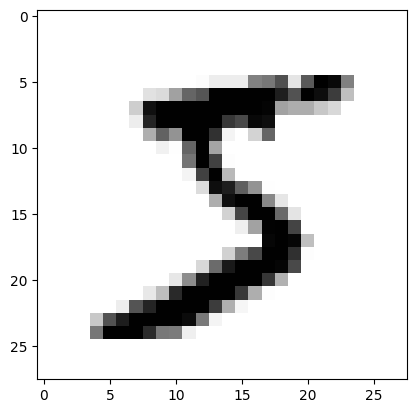

In [4]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#데이터 하나를 살펴보기. cmap을 사용해 좀 더 글씨처럼 보이는 색으로 바꿈.
#다양한 cmap 링크는 https://matplotlib.org/stable/users/explain/colors/colormaps.html
plt.imshow(train_images[0],cmap=cm.binary)

In [8]:
type(train_images) #데이터 타입은 numpy 배열이다.

numpy.ndarray

In [7]:
#input의 형태를 3차원 array에서 matrix로 변환한다.
train_images=train_images.reshape(60000,28*28)
test_images=test_images.reshape(10000,28*28)
#길게 늘어뜨린 픽셀 데이터를 모델에 집어넣는다고 생각하자.

In [9]:
#모델이 처리하기 적합하도록 0~255의 픽셀값을 255로 나누어 0과 1 사이의 float타입 값으로 변환.
train_images=train_images.astype('float')/256
test_images=test_images.astype('float')/256

In [10]:
#데이터가 많아서 0~9까지의 숫자가 train, test 모두에 포함되어 있을 것이라고 예측할 수 있다.
import numpy as np
print(np.unique(train_labels))
print(np.unique(test_labels))
#하지만 test에 있는 것이 train에는 없어서 골치아팠던 적이 있으므로 다 있는게 맞나 확인해봤다.

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [26]:
from tensorflow.keras.utils import to_categorical #모델 입력으로 0~9의 숫자가 아닌, 이진 변수 벡터가 필요하다.
train_labels_one_hot=to_categorical(train_labels)
test_labels_one_hot=to_categorical(test_labels)
#원핫인코딩을 진행한다

print(train_labels_one_hot[0]) #앞서 살펴본 바와 같이, 숫자 5. 이렇게 표현된다.

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [17]:
from tensorflow.keras import models,layers

#과제에서 요구한 랜덤시드 설정
tf.random.set_seed(312)

#모델을 쌓아준다
model=models.Sequential()
model.add(layers.Dense(256,activation='sigmoid',input_shape=(784,))) #rgb가 아닌 gray scale이므로 입력층 unit 수는 1*28*28개
model.add(layers.BatchNormalization()) #첫 제출에서 사용하지 않았던 배치 정규화를 사용해 보았다.
model.add(layers.Dropout(0.3)) #드롭아웃도 썼다. 0.2부터 0.5까지 다양한 값을 사용해본 결과, 0.3이 가장 성능이 좋았다.
model.add(layers.Dense(64,activation='sigmoid')) #relu보다 sigmoid가 좋다는 의견이 있어서 써봤는데 진짜 좋다.
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10,activation='softmax')) #출력층 개수는 클래스의 개수인 10개로 한다.
#다중 클래스 분류에 유용하며, 해당 클래스에 속활 확률의 합이 1이 되게 출력해주는 softmax 함수를 출력층의 활성화함수로 사용한다.

adam=tf.keras.optimizers.Adam(0.01) #손실함수는 adam. 다양한 값을 사용해본 결과, 0.01이 가장 좋은 결과를 냈다.

model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
#회귀에서는 mape를 썼지만, 여기서의 손실함수는 categorical_crossentropy.
#평가 지표로는 accuracy를 사용했다.

#callbacks - early stopping과 learning rate를 사용했다.
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,verbose=1)
lr=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=5,factor=0.5,min_lr=0.00001)
#마찬가지로 여러번의 시도 끝에 가장 좋은 결과를 내는 조합을 찾은 것이다.

#모델 학습
cls_history=model.fit(train_images,train_labels_one_hot,epochs=200,batch_size=1024,validation_split=0.2,callbacks=[es,lr])

#일반적으로 유닛 수가 많아질 때 모델의 표현 능력은 증가하지만 과적합 가능성이 높아지며 계산 비용이 증가한다.
#그래서 유닛 수를 확 줄여서 과적합을 막으면서도 효율적인 학습을 시도하려고 하긴 했다… 이게 맞는지는 모르겠으나.

Epoch 1/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7613 - loss: 0.8285 - val_accuracy: 0.2346 - val_loss: 1.5379 - learning_rate: 0.0100
Epoch 2/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.9233 - loss: 0.2614 - val_accuracy: 0.4945 - val_loss: 1.0960 - learning_rate: 0.0100
Epoch 3/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9437 - loss: 0.1913 - val_accuracy: 0.7404 - val_loss: 0.6801 - learning_rate: 0.0100
Epoch 4/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9556 - loss: 0.1543 - val_accuracy: 0.8854 - val_loss: 0.3667 - learning_rate: 0.0100
Epoch 5/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9616 - loss: 0.1273 - val_accuracy: 0.9423 - val_loss: 0.2068 - learning_rate: 0.0100
Epoch 6/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9658 - loss: 0.1113 - val_accuracy: 0.9536 - val_loss: 0.1452 - learning_rate: 0.0100
Epoch 7/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9679 - loss: 0.1018 - 

In [18]:
model.summary() #모델 요약

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 656,736 (2.51 MB)

 Trainable params: 218,698 (854.29 KB)

 Non-trainable params: 640 (2.50 KB)

 Optimizer params: 437,398 (1.67 MB)

In [19]:
cls_history_dict=cls_history.history
cls_history_dict.keys() #시각화를 위해 모델 history의 key를 모두 출력해본다.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

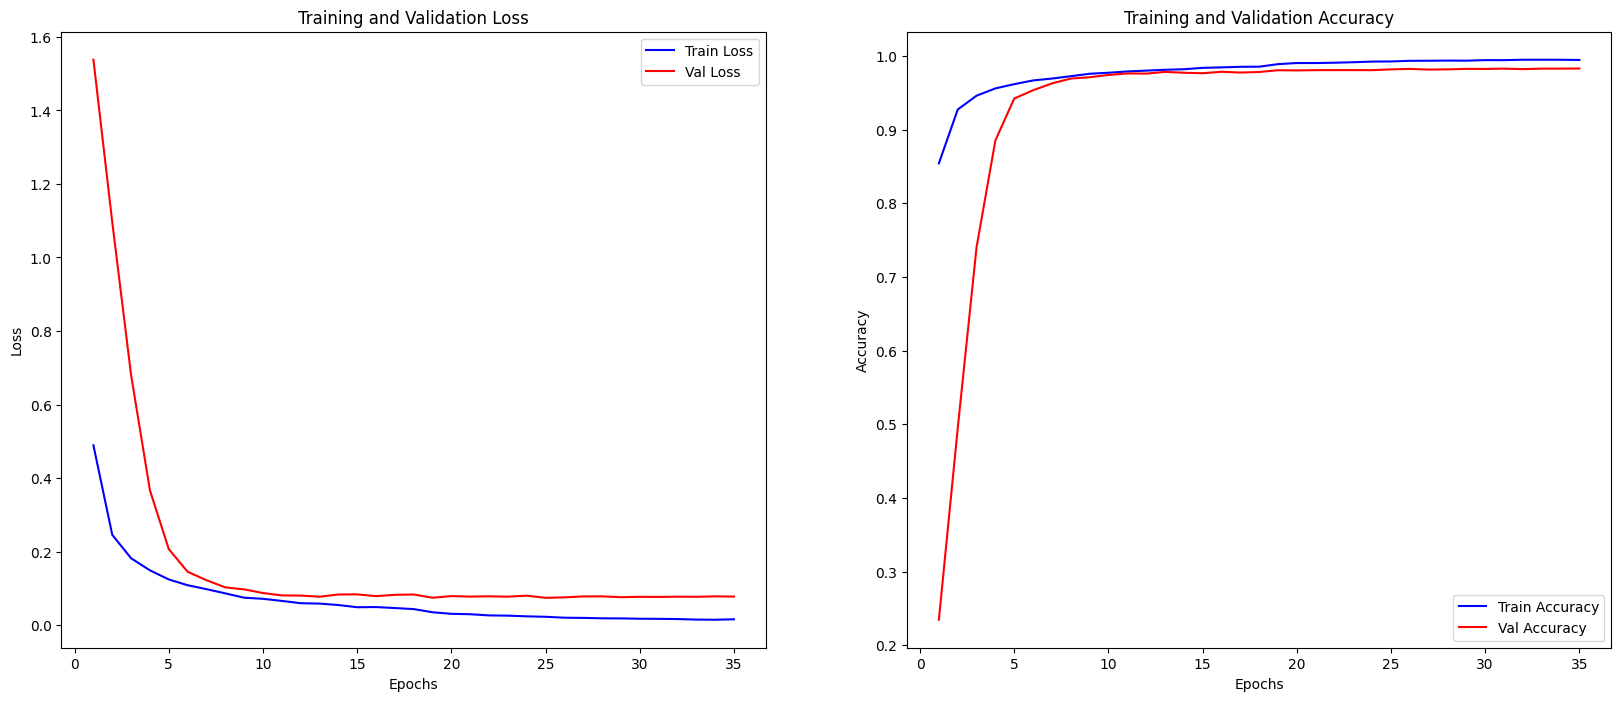

In [24]:
#시각화

import matplotlib.pyplot as plt

loss,val_loss,train_metric,val_metric=cls_history_dict['loss'],cls_history_dict['val_loss'],cls_history_dict['accuracy'],cls_history_dict['val_accuracy']
epochs=range(1,len(loss)+1)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,8))

ax1.plot(epochs,loss,'b',label='Train Loss')
ax1.plot(epochs,val_loss,'r',label='Val Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(epochs,train_metric,'b',label='Train Accuracy')
ax2.plot(epochs, val_metric,'r',label='Val Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

In [25]:
#결과: 모델 성능
test_loss,test_acc = model.evaluate(test_images,test_labels_one_hot)
print('test loss:',test_loss)
print('test_accuracy:',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9779 - loss: 0.0942
test loss: 0.07738226652145386
test_accuracy: 0.982200026512146
